# Homework 11
Evelina Teran & Kevin Smith

In [53]:
import zipfile
import io
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import platform

In [54]:
# Set file path
file_path = os.getcwd() + "/"
if platform.system() == "Windows":
    file_path = file_path.replace("/", "\\")


## Problem 1a

In [55]:

# Path to the zip file
horse_zip = file_path + "horses.zip"

# Directory where the images are extracted
horse_dir = file_path + "horses"

# Extract zip file
with zipfile.ZipFile(horse_zip, 'r') as zip_ref:
    zip_ref.extractall(horse_dir)

# Load horse images
horse_images = []
for filename in sorted(os.listdir(horse_dir)):
    if filename.endswith('.png'):
        img = imageio.imread(os.path.join(horse_dir, filename)) / 255.0
        horse_images.append(img.flatten())

# Check the number of images loaded
print(f"Loaded {len(horse_images)} horse images.")

Loaded 327 horse images.


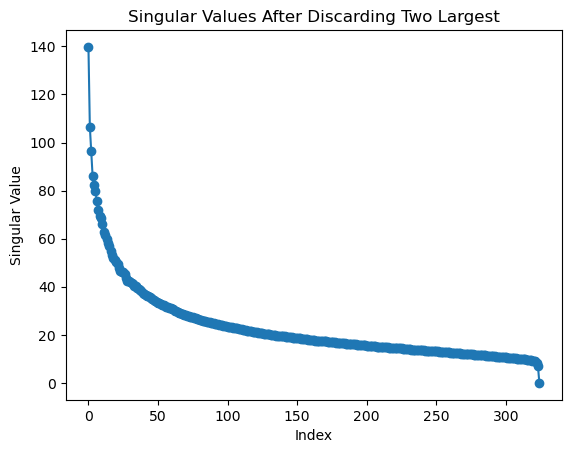

In [56]:
# Convert to numpy array
X_horses = np.array(horse_images)

# Perform PCA
pca = PCA()
pca.fit(X_horses)

# Plot singular values excluding the first two
plt.plot(pca.singular_values_[2:], marker='o')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values After Discarding Two Largest')
plt.show()

## Problem 1b

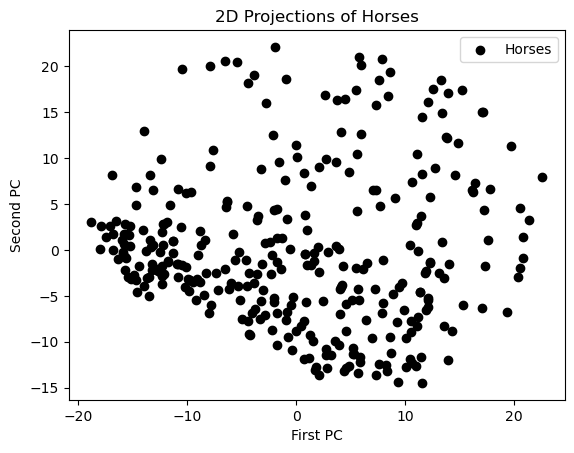

In [57]:
# Reduce dimensions to 2 for plotting
pca_2d = PCA(n_components=2)
X_horses_2d = pca_2d.fit_transform(X_horses)

# Plot 2D projections
plt.scatter(X_horses_2d[:, 0], X_horses_2d[:, 1], c='black', label='Horses')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('2D Projections of Horses')
plt.legend()
plt.show()


## Problem 1c

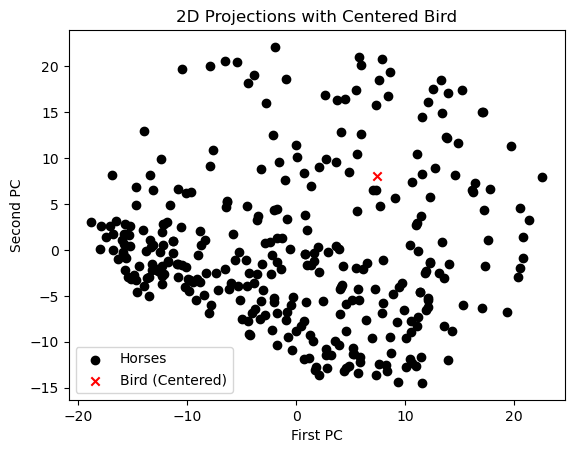

In [58]:
# Subtract the mean of the horse images from the bird image
bird_image_centered = bird_image - np.mean(X_horses, axis=0)

# Project the centered bird image onto the same 2 PCs as the horses
X_bird_2d_centered = pca_2d.transform([bird_image_centered])

# Plot the 2D projections of the horses and the centered bird image
plt.scatter(X_horses_2d[:, 0], X_horses_2d[:, 1], c='black', label='Horses')
plt.scatter(X_bird_2d_centered[0, 0], X_bird_2d_centered[0, 1], c='red', marker='x', label='Bird (Centered)')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('2D Projections with Centered Bird')
plt.legend()
plt.show()


## Problem 1d

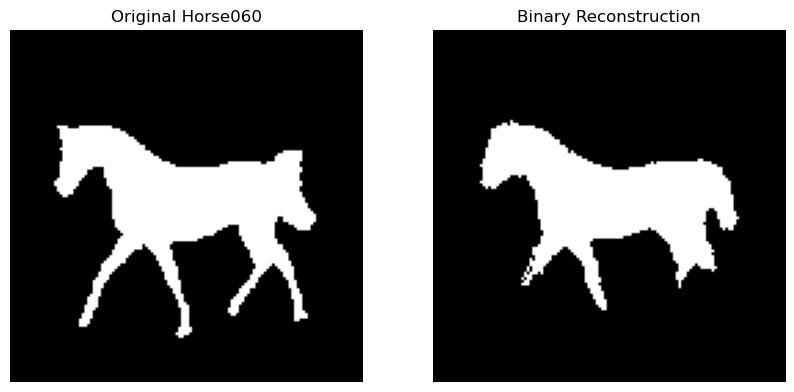

In [59]:
# Perform PCA with 20 components
pca_20 = PCA(n_components=20)
X_horses_pca_20 = pca_20.fit_transform(X_horses)

# Get the index of horse060.png (assuming it's the 60th image in the sorted list)
horse_index = 59

# Reconstruct the image using the first 20 principal components
horse_060_reconstructed = pca_20.inverse_transform(X_horses_pca_20[horse_index]).reshape(128, 128)

# Threshold the reconstructed image to obtain a binary image
horse_060_binary = (horse_060_reconstructed > 0.5).astype(float)

# Display the original and binary reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_horses[horse_index].reshape(128, 128), cmap='gray')
plt.title('Original Horse060')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(horse_060_binary, cmap='gray')
plt.title('Binary Reconstruction')
plt.axis('off')
plt.show()

## Problem 1e

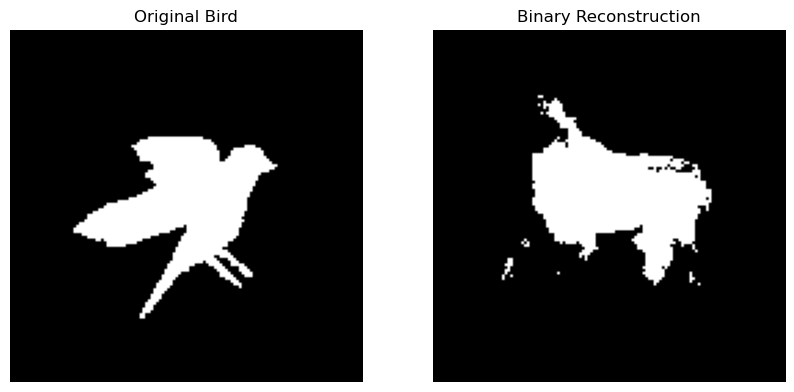

In [60]:
# Project the bird image onto the first 20 principal components
bird_pca_20 = pca_20.transform([bird_image])

# Reconstruct the bird image using the first 20 principal components
bird_reconstructed = pca_20.inverse_transform(bird_pca_20).reshape(128, 128)

# Threshold the reconstructed bird image to obtain a binary image
bird_binary = (bird_reconstructed > 0.5).astype(float)

# Display the original and binary reconstructed bird images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bird_image.reshape(128, 128), cmap='gray')
plt.title('Original Bird')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bird_binary, cmap='gray')
plt.title('Binary Reconstruction')
plt.axis('off')
plt.show()

## Problem 1f

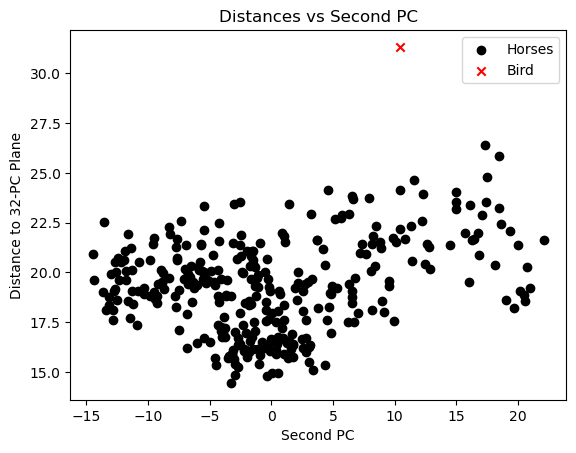

In [61]:
# Perform PCA with 32 components
pca_32 = PCA(n_components=32)
X_horses_32 = pca_32.fit_transform(X_horses)
X_bird_32 = pca_32.transform([bird_image])

# Compute distances to the 32-PC plane
distances_horses = np.linalg.norm(X_horses - pca_32.inverse_transform(X_horses_32), axis=1)
distance_bird = np.linalg.norm([bird_image] - pca_32.inverse_transform(X_bird_32), axis=1)

# Plot distances vs second PC
plt.scatter(X_horses_32[:, 1], distances_horses, c='black', label='Horses')
plt.scatter(X_bird_32[0, 1], distance_bird, c='red', marker='x', label='Bird')
plt.xlabel('Second PC')
plt.ylabel('Distance to 32-PC Plane')
plt.title('Distances vs Second PC')
plt.legend()
plt.show()


## Problem 1g

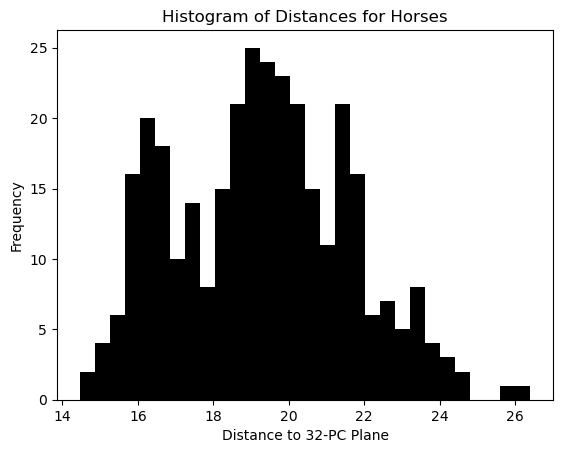

In [62]:
# Plot histogram
plt.hist(distances_horses, bins=30, color='black')
plt.xlabel('Distance to 32-PC Plane')
plt.ylabel('Frequency')
plt.title('Histogram of Distances for Horses')
plt.show()
